## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset


*   Reference for [Topic modeling ](https://https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.
 It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.
 **Topic models** are built around the idea that the semantics of our document are actually being governed by some hidden, or “latent,” variables that we are not observing.

*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




**Topic modeling **is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. 


*   unsupervised machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.
*   doesn’t require training, it’s a quick and easy way to start analyzing your data.

## Data Understanding
### Loading necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [4]:

df=pd.read_csv('/content/drive/MyDrive/Week-0/Tuesday/cleaned_fintech_data.csv')

In [5]:

df.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,0,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,0,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,0,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,0,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,0,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


Form a new data frame (named cleanTweet), containing columns  clean-text  and  polarity .

In [6]:
cleanTweet=df[['original_text','polarity']].rename({'original_text':'clean-text'},axis=1)
cleanTweet.head()

,clean-text,polarity
0,Giving forth life is becoming a burden in Keny...,0.3194444444444445
1,Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,0.0
2,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,0.0
3,Today is World Day to Combat #Desertification ...,0.25
4,Hearing #GregHunt say he's confident vaccines ...,0.5


In [7]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.1)


In [8]:
from gensim.utils import simple_preprocess

cleanTweet= cleanTweet['clean-text'].apply(simple_preprocess)

In [9]:
from gensim import corpora

dictionary = corpora.Dictionary(cleanTweet)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in cleanTweet]

In [10]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2)], [(24, 1), (25, 1), (26, 1), (27, 5), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)], [(0, 3), (4, 1), (12, 1), (19, 1), (23, 2), (46, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1)], [(12, 1), (23, 1), (66, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 2), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (

### Topic Modeling using Latent Dirichlet Allocation 
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

*  The purpose of LDA is mapping each teweets in our corpus to a set of topics 
which covers a good deal of the words in the tweet



In [11]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [12]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [13]:
lsi_model.print_topics()

[(0,
  '0.242*"emissions" + 0.214*"the" + 0.207*"oil" + 0.159*"replacing" + 0.159*"neil" + 0.159*"includes" + 0.159*"andrew" + 0.159*"scatxzvc" + 0.159*"boilers" + 0.159*"sunak"'),
 (1,
  '0.325*"rights" + 0.324*"protecting" + 0.296*"tax" + 0.162*"barrier" + 0.162*"assisting" + 0.162*"mines" + 0.162*"reef" + 0.162*"rent" + 0.162*"medivac" + 0.162*"banning"'),
 (2,
  '0.303*"oil" + 0.210*"scope" + 0.186*"neutral" + 0.142*"amp" + -0.140*"scatxzvc" + -0.140*"andrew" + -0.140*"includes" + -0.140*"replacing" + -0.140*"neil" + -0.139*"sunak"'),
 (3,
  '-0.200*"me" + 0.160*"naik" + 0.160*"bentuk" + 0.160*"macam" + 0.160*"dara" + 0.160*"karena" + 0.160*"selaput" + 0.146*"oil" + -0.141*"with" + -0.114*"be"'),
 (4,
  '-0.229*"naik" + -0.229*"karena" + -0.229*"selaput" + -0.229*"dara" + -0.229*"bentuk" + -0.229*"macam" + 0.143*"oil" + -0.129*"me" + -0.115*"bisa" + -0.115*"tanpa"'),
 (5,
  '-0.300*"wishes" + -0.285*"trend" + -0.263*"fan" + -0.151*"chaalu" + -0.150*"madhyalo" + -0.150*"lekapoina" +

In [14]:
#make a dataframe that shows each topic, its top five words, and its values.
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.242019,emissions,0
1,0.214110,the,0
2,0.207090,oil,0
3,0.159337,includes,0
4,0.159337,scatxzvc,0


Then we'll use seaborn to visualize it.

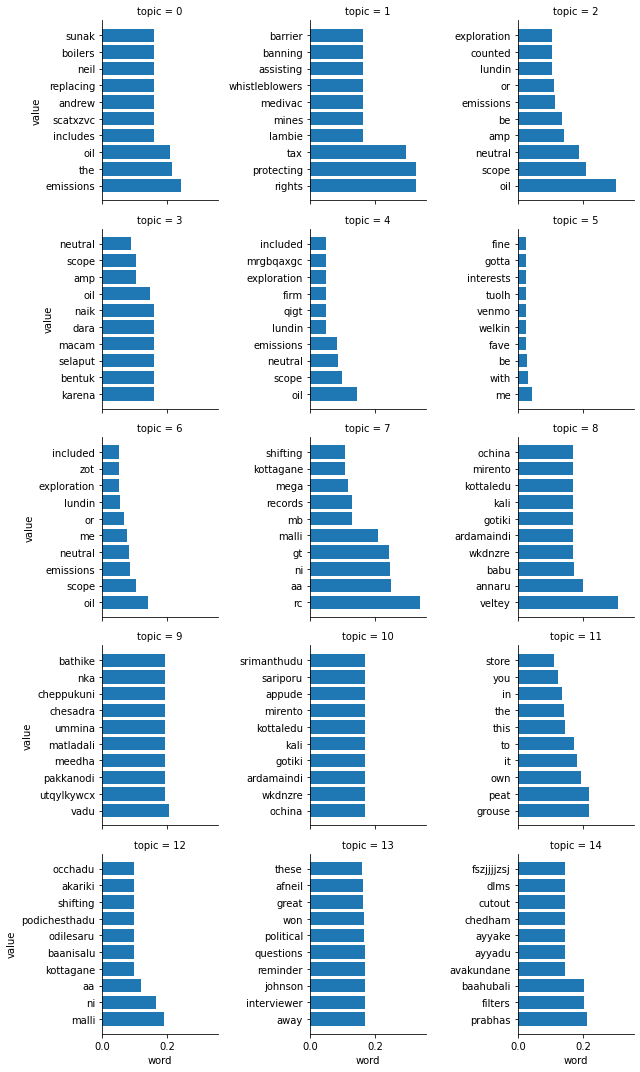

In [15]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

Using LDA with Gensim

In [16]:
from gensim import models

n_topics = 15

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [17]:
lda_model.print_topics()

[(0,
  '0.027*"100" + 0.027*"23" + 0.023*"0" + 0.021*"11" + 0.019*"66" + 0.015*"19" + 0.012*"54" + 0.012*"12" + 0.010*"435" + 0.008*"3301"'),
 (1,
  '0.030*"1074" + 0.020*"1061" + 0.019*"35" + 0.018*"100" + 0.018*"1070" + 0.015*"1501" + 0.015*"973" + 0.015*"665" + 0.014*"1495" + 0.012*"1071"'),
 (2,
  '0.050*"100" + 0.042*"23" + 0.031*"0" + 0.029*"66" + 0.023*"19" + 0.016*"285" + 0.015*"204" + 0.015*"435" + 0.013*"453" + 0.012*"428"'),
 (3,
  '0.046*"35" + 0.042*"260" + 0.034*"256" + 0.029*"54" + 0.028*"625" + 0.024*"216" + 0.021*"2743" + 0.020*"445" + 0.018*"946" + 0.016*"443"'),
 (4,
  '0.020*"1464" + 0.020*"1468" + 0.020*"1470" + 0.014*"125" + 0.014*"0" + 0.012*"89" + 0.012*"66" + 0.012*"594" + 0.011*"291" + 0.011*"1416"'),
 (5,
  '0.064*"100" + 0.034*"23" + 0.029*"0" + 0.019*"169" + 0.016*"19" + 0.016*"11" + 0.010*"285" + 0.009*"453" + 0.009*"66" + 0.008*"144"'),
 (6,
  '0.027*"100" + 0.020*"23" + 0.013*"446" + 0.012*"1546" + 0.012*"125" + 0.011*"1544" + 0.011*"1542" + 0.011*"331" 

Each line is a topic with individual topic terms and weights. Topic0  can be termed as climate change, and Topic4 can be termed as government and carbon emission.

# **Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

Basic Ldamodel Coherence Score 0.58 This means that the model has performed reasonably well in topic modeling.

In [18]:
!pip install pyLDAvis 

**Anlayizing results**
Exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [19]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis



pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).ep

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.210525  0.011537       1        1  16.232459
4     -0.026439 -0.150793       2        1  12.142124
9     -0.169078  0.079260       3        1  10.381614
0     -0.127368 -0.014939       4        1   8.771657
3      0.280807 -0.069626       5        1   7.648941
5     -0.193140 -0.016858       6        1   6.555445
6     -0.130523 -0.032012       7        1   6.298776
12     0.086155 -0.023161       8        1   6.225625
10    -0.174717  0.015700       9        1   5.597116
1     -0.009626 -0.114791      10        1   4.504496
7      0.154955  0.335911      11        1   4.430549
11     0.185946 -0.021016      12        1   4.112519
13     0.149002 -0.072132      13        1   2.978677
14     0.190369 -0.057498      14        1   2.251749
8     -0.005819  0.130419      15        1   1.868252, topic_info=          Term         Freq        Total Category  logprob  loglift
100        the  4782.000000  4782.000000  Default  30.0000  30.0000
35        kuda  2305.000000  2305.000000  Default  29.0000  29.0000
92   emissions  1054.000000  1054.000000  Default  28.0000  28.0000
260         rc   699.000000   699.000000  Default  27.0000  27.0000
347        oil   615.000000   615.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
576        oru    21.680698    34.000001  Topic15  -5.0214   3.5302
125       with    31.332476   864.266163  Topic15  -4.6532   0.6629
443         ki    26.393597   552.579542  Topic15  -4.8247   0.9387
144      money    25.596258   418.861120  Topic15  -4.8554   1.1851
19          of    23.804528  1867.633354  Topic15  -4.9280  -0.3824

[929 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
625       1  0.004315    aa
625       3  0.002158    aa
625       4  0.151034    aa
625       5  0.802638    aa
625       8  0.004315    aa
...     ...       ...   ...
354      11  0.005886   zot
1505      2  0.015415  zulr
1505      3  0.015415  zulr
1505      6  0.061661  zulr
1505     10  0.894083  zulr

[3395 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 10, 1, 4, 6, 7, 13, 11, 2, 8, 12, 14, 15, 9])

In [20]:
from wordcloud import WordCloud

In [21]:
def make_wordcloud(series):
  all_text = ','.join(list(series.values))
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3)
  wordcloud.generate(all_text)
  return wordcloud.to_image()

In [25]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


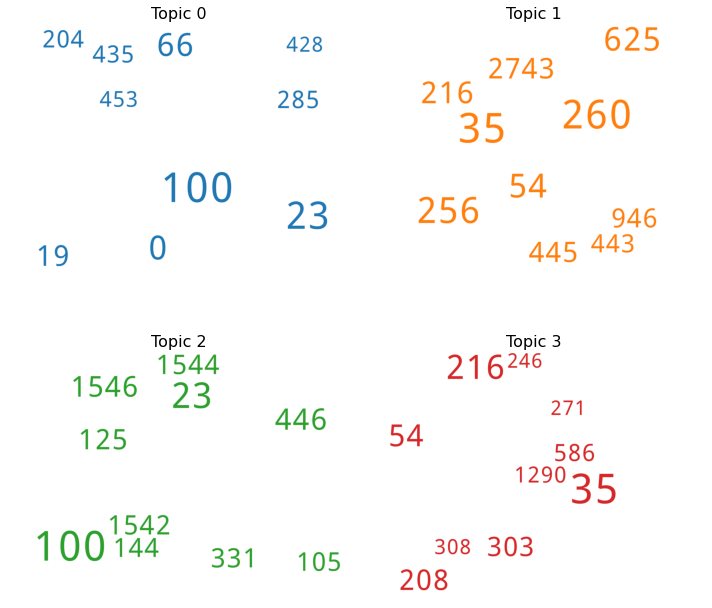

In [26]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()